# Setup

In [1]:
%matplotlib inline

# Load in Data

In [2]:
from sklearn.datasets import fetch_openml
import pandas as pd

train = pd.read_csv("train.csv")
X_test = pd.read_csv('test.csv')
display(train.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Exploration

In [3]:
import numpy as np

train_copy = train.copy()

train_copy.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We are missing 177 age attributes

In [4]:
train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We definetly can remove the Name category, and we are missing almost all the Cabin attributes

In [5]:
train_copy["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Need to change Male/Female to Binary

In [6]:
from sklearn.preprocessing import LabelBinarizer
binarizer = LabelBinarizer()
bin_sex = binarizer.fit_transform(train_copy["Sex"])
train_copy["Sex"] = bin_sex
train_copy["Sex"].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [7]:
print(train_copy["Embarked"].value_counts())
print(train_copy[train_copy["Embarked"].isnull()])


S    644
C    168
Q     77
Name: Embarked, dtype: int64
     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

     Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  
61     0  38.0      0      0  113572  80.0   B28      NaN  
829    0  62.0      0      0  113572  80.0   B28      NaN  


In [8]:
train_copy["Cabin"].value_counts()

C23 C25 C27    4
B96 B98        4
G6             4
F33            3
E101           3
              ..
D50            1
D30            1
C148           1
A31            1
B101           1
Name: Cabin, Length: 147, dtype: int64

In [9]:
train_copy.corr()["Survived"].sort_values()

Sex           -0.543351
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
Survived       1.000000
Name: Survived, dtype: float64

 Looks like Pclass, Age, Fare and Parch are most signifigant with Passenger ID being nearly useless

array([<AxesSubplot:xlabel='PassengerId', ylabel='Pclass'>,
       <AxesSubplot:xlabel='Survived', ylabel='Pclass'>,
       <AxesSubplot:xlabel='Pclass', ylabel='Pclass'>,
       <AxesSubplot:xlabel='Sex', ylabel='Pclass'>,
       <AxesSubplot:xlabel='Age', ylabel='Pclass'>,
       <AxesSubplot:xlabel='SibSp', ylabel='Pclass'>,
       <AxesSubplot:xlabel='Parch', ylabel='Pclass'>,
       <AxesSubplot:xlabel='Fare', ylabel='Pclass'>], dtype=object)

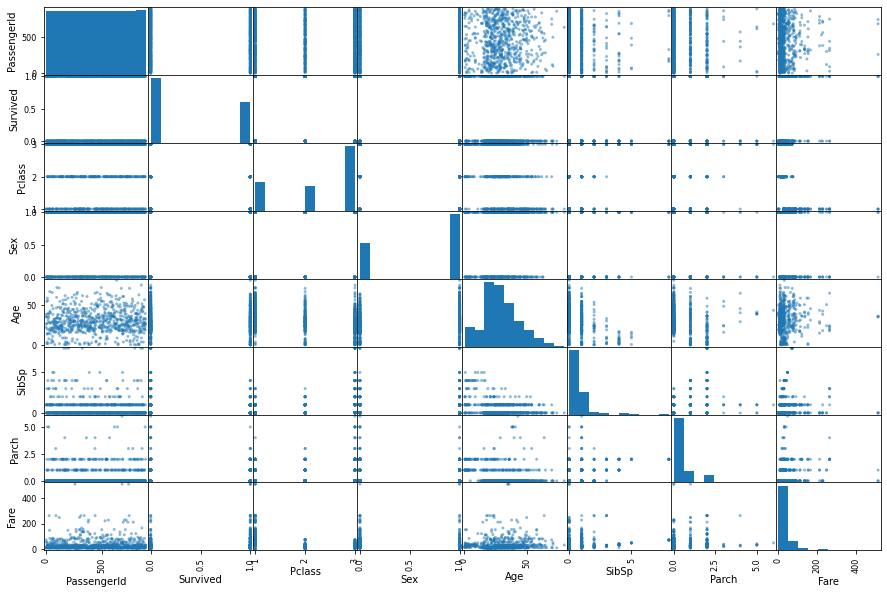

In [10]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
train_copy = train_copy#.drop(["PassengerId", "Cabin", "Name", "Ticket"], axis = 1)
scatter_matrix(train_copy, figsize = (15,10))[2]

Looks like almost all data except for age is categorical


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int32(1), int64(5), object(4)
memory usage: 80.2+ KB
None


array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>]],
      dtype=object)

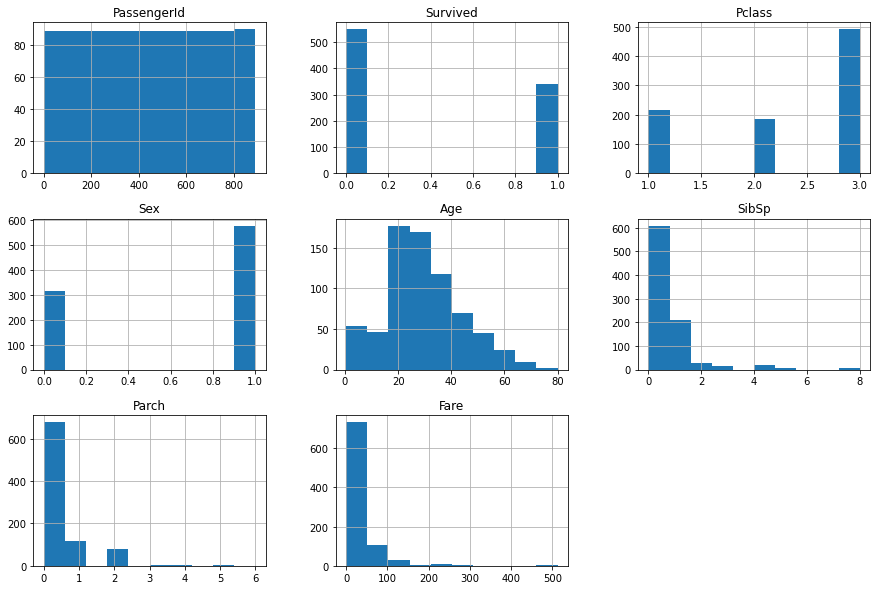

In [11]:
print(train_copy.info())
train_copy.hist(figsize=(15,10))

In [12]:
df_na = train_copy[train_copy["Embarked"].isnull()]
df_na

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",0,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",0,62.0,0,0,113572,80.0,B28,NaN


Lets look at the Ages

<AxesSubplot:xlabel='Age'>

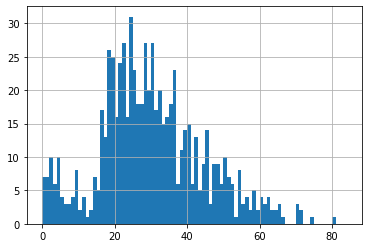

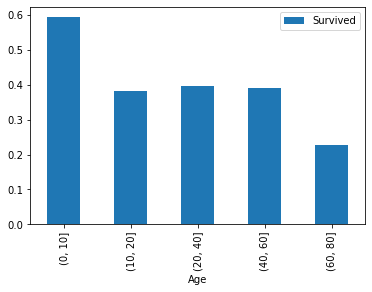

In [13]:
bins = pd.cut(train_copy['Age'], [0, 10, 20, 40,60,80])

train_copy['Age'].hist(bins = np.arange(85))
train_copy[['Survived']].groupby(bins).mean().plot.bar()

# Remove the one outlier who is 80

Gonna look at names now

<AxesSubplot:xlabel='title'>

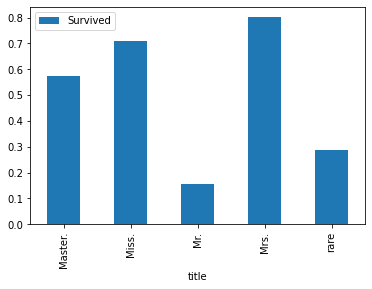

In [14]:
train_copy = train.copy()

title_array = []
names = train_copy['Name']
# names
for n in range(len(names)):
    name = names[n]
    title = name.split(" ")[1]
    if title == 'Mr.':
        title_array.append('Mr.')
    elif title in ['Miss.','Mlle.','Mme.','Ms.']:
        title_array.append('Miss.')
    elif title in ["Mrs."]:
        title_array.append("Mrs.")
    elif title in ["Master."]:
        title_array.append('Master.')
    else:
        title_array.append('rare')

pd.Series(title_array).value_counts()
train_copy['title'] = title_array

train_copy[["Survived",'title']].groupby('title').mean().plot.bar()

Now lets try to figure out family names

<AxesSubplot:xlabel='family_size'>

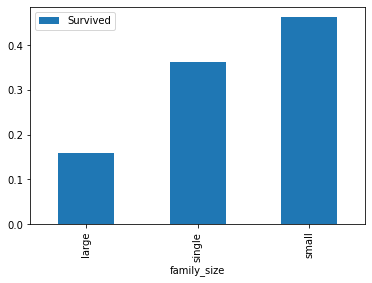

In [15]:
train_copy = train.copy()

names = train_copy['Name']
family_name_arr = []
family_size_arr = []
family_size_cat = []
for n in range(len(names)):
    name = names[n].lower()
    family_name = name.split(" ")[0]
    family_name_arr.append(family_name)

for f in family_name_arr:
    family_size = family_name_arr.count(f)
    family_size_arr.append(family_size)
    
    if family_size == 1:
        family_size_cat.append('single')
    elif family_size <=4:
        family_size_cat.append('small')
    else:
        family_size_cat.append('large')
        
train_copy['family_name'] = family_name_arr
train_copy['family_size'] = family_size_cat
train_copy[['family_size','Survived']].groupby('family_size').mean().plot.bar()

Now for cabin names

<AxesSubplot:xlabel='cabin_letters'>

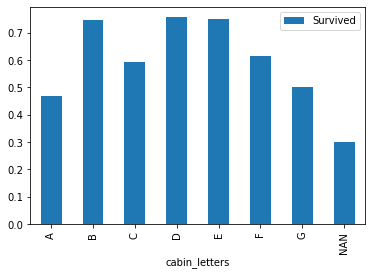

In [16]:
train_copy = train.copy()
cabin_letters = []

for n in train_copy['Cabin']:
    n = str(n)
    if list(n)[0] in ['A','B','C','D','E','F','G']:
        cabin_letters.append(list(n)[0])
    else:
        cabin_letters.append("NAN")
train_copy['cabin_letters'] = cabin_letters
train_copy[['cabin_letters','Survived']].groupby('cabin_letters').mean().plot.bar()


In conclusion, Name, Passenger ID, Ticket and  Cabin should all be removed. Age and Embarked have missing data. Sex, pclass and embarked need to be categorical (for sex its just binary, use a one-hot encoder for embarked)

# Prepare Data

In [17]:
X_train = train.drop(["Survived"],axis = 1)
y_train = train["Survived"]

# X_train.drop(["PassengerId", "Cabin", "Name", "Ticket"],axis = 1, inplace = True)

In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


###  Numerical Pipeline

In [19]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

numeric_pipeline = Pipeline([('numeric_imputer',SimpleImputer(strategy = 'median')), # Since mean may skew older
                            ('numeric_scaler',StandardScaler())])


###  Categorical Pipeline

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin

class AttributeAdder(BaseEstimator,TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):  
        ticket_series = X[["Ticket"]]
        ticket_array = np.array(ticket_series)
        ticket_prefix = ticket_array.copy()
        for n in range(ticket_array.shape[0]): 
            split = ticket_array[n][0].split(" ")
            if len(split) == 1:
                if split[0] == 'LINE':
                    ticket_prefix[n] = 'LINE'
                else:
                    ticket_prefix[n] = 'Nothin'
            else:
                new = split[0].upper()
                new = new.replace('.','')
                new = new.replace('/','')
                if new[0] == 'A':
                    ticket_prefix[n] = 'A'
                elif new[:3] in ['SOT','STO']:
                    ticket_prefix[n] = 'STO'
                else:
                    ticket_prefix[n] = new[:3]
        
        unique, counts = np.unique(ticket_prefix, return_counts=True)
        for i in zip(unique,counts):
            prefix = i[0]
            count = i[1]
            if count <10:
                ticket_prefix[ticket_prefix == prefix] = 'Nothin'      
        
        title_array = []
        names = X['Name']
        # names
        for n in range(len(names)):
            name = names[n]
            title = name.split(" ")[1]
            if title == 'Mr.':
                title_array.append('Mr.')
            elif title in ['Miss.','Mlle.','Mme.','Ms.']:
                title_array.append('Miss.')
            elif title in ["Mrs."]:
                title_array.append("Mrs.")
            elif title in ["Master."]:
                title_array.append('Master.')
            else:
                title_array.append('rare')
        
        family_name_arr = []
        family_size_arr = []
        family_size_cat = []
        for n in range(len(names)):
            name = names[n].lower()
            family_name = name.split(" ")[0]
            family_name_arr.append(family_name)

        for f in family_name_arr:
            family_size = family_name_arr.count(f)
            family_size_arr.append(family_size)

            if family_size == 1:
                family_size_cat.append('single')
            elif family_size <=4:
                family_size_cat.append('small')
            else:
                family_size_cat.append('large')
                
        cabin_letters = []
        for n in X['Cabin']:
            n = str(n)
            if list(n)[0] in ['A','B','C','D','E','F','G']:
                cabin_letters.append(list(n)[0])
            else:
                cabin_letters.append("NAN")
        return np.c_[X.drop(["Ticket",'Name','Cabin'],axis = 1), ticket_prefix, title_array, family_size_cat,cabin_letters]

cat_imputer = SimpleImputer(strategy = 'most_frequent')

categorical_pipeline = Pipeline([('ticket_prefix_adder',AttributeAdder()),
                                ('categorical_imputer',SimpleImputer(strategy = 'most_frequent')),
                                ('encoder', OneHotEncoder(sparse = False))])


In [21]:
from sklearn.compose import ColumnTransformer

num_attribs = ['Age','SibSp','Parch','Fare']
cat_attribs = ['Pclass', 'Sex','Embarked','Ticket', 'Name', 'Cabin']

full_pipeline = ColumnTransformer([('numeric',numeric_pipeline,num_attribs),
                                  ('categorical',categorical_pipeline,cat_attribs)])

In [22]:
# Remove the 80 year old

X_train_outlier_removed = X_train[X_train.loc[:,'Age'] != 80].reset_index()
X_train_outlier_removed.drop('index',axis = 1,inplace= True)
y_train_prepared = y_train[X_train['Age'] != 80]
X_train_prepared = full_pipeline.fit_transform(X_train_outlier_removed)

# Model Time 

In [23]:
def grid_search_df(grid_search_cv_results):
    return pd.concat([pd.DataFrame(grid_search_cv_results["params"]),pd.DataFrame(grid_search_cv_results["mean_test_score"], columns=["Accuracy"])],axis=1).sort_values('Accuracy',ascending = False)

### SVC

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

svc = SVC()

param_grid = [{'kernel':['linear','poly','rbf','sigmoid'],
              'degree':[0.01,0.1,1,3,5,10],
              'gamma':['scale','auto']}]
svc_grid_search = GridSearchCV(svc,param_grid,cv = 5, scoring = 'accuracy', return_train_score = True,verbose = 1)

svc_grid_search.fit(X_train_prepared,y_train_prepared)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    9.4s finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'degree': [0.01, 0.1, 1, 3, 5, 10],
                          'gamma': ['scale', 'auto'],
                          'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [25]:
grid_search_df(svc_grid_search.cv_results_).head(10)

,degree,gamma,kernel,Accuracy
10,0.10,scale,rbf,0.832584
34,5.00,scale,rbf,0.832584
2,0.01,scale,rbf,0.832584
26,3.00,scale,rbf,0.832584
18,1.00,scale,rbf,0.832584
42,10.00,scale,rbf,0.832584
25,3.00,scale,poly,0.831461
38,5.00,auto,rbf,0.829213
22,1.00,auto,rbf,0.829213
6,0.01,auto,rbf,0.829213


In [26]:
svc_grid_search.best_params_
svc_grid_search.param_grid

[{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
  'degree': [0.01, 0.1, 1, 3, 5, 10],
  'gamma': ['scale', 'auto']}]

In [27]:
svc_classifier = SVC(**svc_grid_search.best_params_)
svc_classifier.fit(X_train_prepared,y_train_prepared)

svc_scores = cross_val_score(svc_classifier,X_train_prepared,y_train_prepared, cv = 10)

In [28]:
svc_scores.mean()

0.8370786516853933

### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

param_grid = [{'n_estimators':[10,100,1000],
              'criterion':['gini','entropy'],
              'max_features':['sqrt',None]}]
grid_search_forest = GridSearchCV(forest,param_grid,cv = 5, scoring = 'accuracy', return_train_score = True, verbose= 2)

grid_search_forest.fit(X_train_prepared,y_train_prepared)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] criterion=gini, max_features=sqrt, n_estimators=10 ..............
[CV]  criterion=gini, max_features=sqrt, n_estimators=10, total=   0.0s
[CV] criterion=gini, max_features=sqrt, n_estimators=10 ..............
[CV]  criterion=gini, max_features=sqrt, n_estimators=10, total=   0.0s
[CV] criterion=gini, max_features=sqrt, n_estimators=10 ..............
[CV]  criterion=gini, max_features=sqrt, n_estimators=10, total=   0.0s
[CV] criterion=gini, max_features=sqrt, n_estimators=10 ..............
[CV]  criterion=gini, max_features=sqrt, n_estimators=10, total=   0.0s
[CV] criterion=gini, max_features=sqrt, n_estimators=10 ..............
[CV]  criterion=gini, max_features=sqrt, n_estimators=10, total=   0.0s
[CV] criterion=gini, max_features=sqrt, n_estimators=100 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  criterion=gini, max_features=sqrt, n_estimators=100, total=   0.2s
[CV] criterion=gini, max_features=sqrt, n_estimators=100 .............
[CV]  criterion=gini, max_features=sqrt, n_estimators=100, total=   0.2s
[CV] criterion=gini, max_features=sqrt, n_estimators=100 .............
[CV]  criterion=gini, max_features=sqrt, n_estimators=100, total=   0.2s
[CV] criterion=gini, max_features=sqrt, n_estimators=100 .............
[CV]  criterion=gini, max_features=sqrt, n_estimators=100, total=   0.2s
[CV] criterion=gini, max_features=sqrt, n_estimators=100 .............
[CV]  criterion=gini, max_features=sqrt, n_estimators=100, total=   0.2s
[CV] criterion=gini, max_features=sqrt, n_estimators=1000 ............
[CV]  criterion=gini, max_features=sqrt, n_estimators=1000, total=   1.9s
[CV] criterion=gini, max_features=sqrt, n_estimators=1000 ............
[CV]  criterion=gini, max_features=sqrt, n_estimators=1000, total=   1.8s
[CV] criterion=gini, max_features=sqrt, n_estimators=1000 ...

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   57.3s finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_features': ['sqrt', None],
                          'n_estimators': [10, 100, 1000]}],
             return_train_score=True, scoring='accuracy', verbose=2)

In [30]:
grid_search_df(grid_search_forest.cv_results_)

,criterion,max_features,n_estimators,Accuracy
5,gini,None,1000,0.833708
11,entropy,None,1000,0.825843
4,gini,None,100,0.822472
10,entropy,None,100,0.820225
3,gini,None,10,0.819101
0,gini,sqrt,10,0.812360
6,entropy,sqrt,10,0.812360
1,gini,sqrt,100,0.808989
9,entropy,None,10,0.807865
7,entropy,sqrt,100,0.806742


In [31]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(**grid_search_forest.best_params_)
random_forest_classifier.fit(X_train_prepared, y_train_prepared)

random_forest_scores = cross_val_score(random_forest_classifier,X_train_prepared,y_train_prepared,cv = 10)

In [32]:
random_forest_scores.mean()

0.8247191011235955

### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

param_grid = [{'solver':['newton-cg','lbfgs'],
              'penalty':['l2','l1'],
               'max_iter':[100,1000]
              }]

logistic_regression_classifier = LogisticRegression()
grid_search_logistic = GridSearchCV(logistic_regression_classifier,param_grid, cv = 5, scoring = 'accuracy', return_train_score = True, verbose= 2)
grid_search_logistic.fit(X_train_prepared,y_train_prepared)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] max_iter=100, penalty=l2, solver=newton-cg ......................
[CV] ....... max_iter=100, penalty=l2, solver=newton-cg, total=   0.0s
[CV] max_iter=100, penalty=l2, solver=newton-cg ......................
[CV] ....... max_iter=100, penalty=l2, solver=newton-cg, total=   0.0s
[CV] max_iter=100, penalty=l2, solver=newton-cg ......................
[CV] ....... max_iter=100, penalty=l2, solver=newton-cg, total=   0.0s
[CV] max_iter=100, penalty=l2, solver=newton-cg ......................
[CV] ....... max_iter=100, penalty=l2, solver=newton-cg, total=   0.0s
[CV] max_iter=100, penalty=l2, solver=newton-cg ......................
[CV] ....... max_iter=100, penalty=l2, solver=newton-cg, total=   0.0s
[CV] max_iter=100, penalty=l2, solver=lbfgs ..........................
[CV] ........... max_iter=100, penalty=l2, solver=lbfgs, total=   0.0s
[CV] max_iter=100, penalty=l2, solver=lbfgs ..........................
[CV] ........... 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] max_iter=100, penalty=l1, solver=newton-cg ......................
[CV] ....... max_iter=100, penalty=l1, solver=newton-cg, total=   0.0s
[CV] max_iter=100, penalty=l1, solver=newton-cg ......................
[CV] ....... max_iter=100, penalty=l1, solver=newton-cg, total=   0.0s
[CV] max_iter=100, penalty=l1, solver=newton-cg ......................
[CV] ....... max_iter=100, penalty=l1, solver=newton-cg, total=   0.0s
[CV] max_iter=100, penalty=l1, solver=newton-cg ......................
[CV] ....... max_iter=100, penalty=l1, solver=newton-cg, total=   0.0s
[CV] max_iter=100, penalty=l1, solver=newton-cg ......................
[CV] ....... max_iter=100, penalty=l1, solver=newton-cg, total=   0.0s
[CV] max_iter=100, penalty=l1, solver=lbfgs ..........................
[CV] ........... max_iter=100, penalty=l1, solver=lbfgs, total=   0.0s
[CV] max_iter=100, penalty=l1, solver=lbfgs ..........................
[CV] ........... max_iter=100, penalty=l1, solver=lbfgs, total=   0.0s
[CV] 

C:\Users\verta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\verta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\verta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\verta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\verta\anaconda3\lib\site-packages\sklearn\model_selectio

[CV] .......... max_iter=1000, penalty=l2, solver=lbfgs, total=   0.0s
[CV] max_iter=1000, penalty=l2, solver=lbfgs .........................
[CV] .......... max_iter=1000, penalty=l2, solver=lbfgs, total=   0.0s
[CV] max_iter=1000, penalty=l2, solver=lbfgs .........................
[CV] .......... max_iter=1000, penalty=l2, solver=lbfgs, total=   0.0s
[CV] max_iter=1000, penalty=l1, solver=newton-cg .....................
[CV] ...... max_iter=1000, penalty=l1, solver=newton-cg, total=   0.0s
[CV] max_iter=1000, penalty=l1, solver=newton-cg .....................
[CV] ...... max_iter=1000, penalty=l1, solver=newton-cg, total=   0.0s
[CV] max_iter=1000, penalty=l1, solver=newton-cg .....................
[CV] ...... max_iter=1000, penalty=l1, solver=newton-cg, total=   0.0s
[CV] max_iter=1000, penalty=l1, solver=newton-cg .....................
[CV] ...... max_iter=1000, penalty=l1, solver=newton-cg, total=   0.0s
[CV] max_iter=1000, penalty=l1, solver=newton-cg .....................
[CV] .

C:\Users\verta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\verta\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\verta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\verta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\verta\anaconda3\lib\site-packages\sklearn\model_selectio

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'max_iter': [100, 1000], 'penalty': ['l2', 'l1'],
                          'solver': ['newton-cg', 'lbfgs']}],
             return_train_score=True, scoring='accuracy', verbose=2)

In [34]:
grid_search_df(grid_search_logistic.cv_results_)

,max_iter,penalty,solver,Accuracy
0,100,l2,newton-cg,0.829213
1,100,l2,lbfgs,0.829213
4,1000,l2,newton-cg,0.829213
5,1000,l2,lbfgs,0.829213
2,100,l1,newton-cg,NaN
3,100,l1,lbfgs,NaN
6,1000,l1,newton-cg,NaN
7,1000,l1,lbfgs,NaN


In [35]:
logistic = LogisticRegression(**grid_search_logistic.best_params_)

logistic.fit(X_train_prepared,y_train_prepared)

logistic_regression_scores = cross_val_score(logistic,X_train_prepared,y_train_prepared, cv = 10)

In [36]:
logistic_regression_scores.mean()

0.8303370786516855

### K-neighbours 

In [37]:
from sklearn.neighbors import KNeighborsClassifier

kneighbours = KNeighborsClassifier()

param_grid = [{'n_neighbors':[1,3,5,7,10,15],
              'weights':['uniform','distance'],
              'algorithm':['auto','ball_tree','kd_tree','brute']}]
grid_search_kneighbours = GridSearchCV(kneighbours,param_grid,cv = 5, scoring = 'accuracy', return_train_score = True,verbose = 2)

grid_search_kneighbours.fit(X_train_prepared,y_train_prepared)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV] ... algorithm=auto, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV] ... algorithm=auto, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV] ... algorithm=auto, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ... algorithm=auto, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=uniform ..................
[CV] ... algorithm=auto, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=distance .................
[CV] .. algorithm=auto, n_neighbors=1, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=distance .................
[CV] .. algorithm=auto, n_neighbors=1, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=distance .................
[CV] .. algorithm=auto, n_neighbors=1, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=distance .................
[CV] .. algorithm=auto, n_neighbors=1, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=1, weights=distance .................
[CV] .. algorithm=auto, n_neighbors=1, weights=distance, total=   0.0s
[CV] algorithm=auto, n_neighbors=3, weights=uniform ..................
[CV] .

[CV]  algorithm=ball_tree, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=1, weights=uniform .............
[CV]  algorithm=ball_tree, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=1, weights=uniform .............
[CV]  algorithm=ball_tree, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=1, weights=distance ............
[CV]  algorithm=ball_tree, n_neighbors=1, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=1, weights=distance ............
[CV]  algorithm=ball_tree, n_neighbors=1, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=1, weights=distance ............
[CV]  algorithm=ball_tree, n_neighbors=1, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=1, weights=distance ............
[CV]  algorithm=ball_tree, n_neighbors=1, weights=distance, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=1, weights=distance .

[CV]  algorithm=kd_tree, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=1, weights=uniform ...............
[CV]  algorithm=kd_tree, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=1, weights=uniform ...............
[CV]  algorithm=kd_tree, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=1, weights=distance ..............
[CV]  algorithm=kd_tree, n_neighbors=1, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=1, weights=distance ..............
[CV]  algorithm=kd_tree, n_neighbors=1, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=1, weights=distance ..............
[CV]  algorithm=kd_tree, n_neighbors=1, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=1, weights=distance ..............
[CV]  algorithm=kd_tree, n_neighbors=1, weights=distance, total=   0.0s
[CV] algorithm=kd_tree, n_neighbors=1, weights=distance ..............
[C

[CV] .. algorithm=brute, n_neighbors=1, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=1, weights=distance ................
[CV] . algorithm=brute, n_neighbors=1, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=1, weights=distance ................
[CV] . algorithm=brute, n_neighbors=1, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=1, weights=distance ................
[CV] . algorithm=brute, n_neighbors=1, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=1, weights=distance ................
[CV] . algorithm=brute, n_neighbors=1, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=1, weights=distance ................
[CV] . algorithm=brute, n_neighbors=1, weights=distance, total=   0.0s
[CV] algorithm=brute, n_neighbors=3, weights=uniform .................
[CV] .. algorithm=brute, n_neighbors=3, weights=uniform, total=   0.0s
[CV] algorithm=brute, n_neighbors=3, weights=uniform .................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    9.4s finished


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'n_neighbors': [1, 3, 5, 7, 10, 15],
                          'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='accuracy', verbose=2)

In [38]:
grid_search_df(grid_search_kneighbours.cv_results_).head(10)

,algorithm,n_neighbors,weights,Accuracy
42,brute,7,uniform,0.820225
20,ball_tree,10,uniform,0.820225
44,brute,10,uniform,0.820225
8,auto,10,uniform,0.820225
32,kd_tree,10,uniform,0.820225
6,auto,7,uniform,0.819101
18,ball_tree,7,uniform,0.819101
30,kd_tree,7,uniform,0.819101
21,ball_tree,10,distance,0.815730
9,auto,10,distance,0.815730


In [39]:
kneighbours = KNeighborsClassifier(**grid_search_kneighbours.best_params_)

kneighbours.fit(X_train_prepared,y_train_prepared)

kneighbours_score = cross_val_score(kneighbours,X_train_prepared,y_train_prepared, cv = 10)

In [40]:
kneighbours_score.mean()

0.8258426966292134

# Comparison

In [41]:
print("SVC:", svc_scores.mean())
print("random_forest:", random_forest_scores.mean())
print("logistic_regression:", logistic_regression_scores.mean())
print("k-neighbours:", kneighbours_score.mean())

SVC: 0.8370786516853933
random_forest: 0.8247191011235955
logistic_regression: 0.8303370786516855
k-neighbours: 0.8258426966292134


# Finish Them up!

In [42]:
svc_finished_pipeline = Pipeline([('processing_pipeline',full_pipeline),
                             ('svc_estimator',svc_grid_search.best_estimator_)])
svc_finished_pipeline.fit(X_train_outlier_removed,y_train_prepared)

random_forest_finished_pipeline = Pipeline([('processing_pipeline',full_pipeline),
                             ('svc_estimator',grid_search_forest.best_estimator_)])
random_forest_finished_pipeline.fit(X_train_outlier_removed,y_train_prepared)

logistic_regression_finished_pipeline = Pipeline([('processing_pipeline',full_pipeline),
                             ('svc_estimator',grid_search_logistic.best_estimator_)])
logistic_regression_finished_pipeline.fit(X_train_outlier_removed,y_train_prepared)

kneighbours_finished_pipeline = Pipeline([('processing_pipeline',full_pipeline),
                             ('svc_estimator',grid_search_kneighbours.best_estimator_)])
kneighbours_finished_pipeline.fit(X_train_outlier_removed,y_train_prepared)

Pipeline(steps=[('processing_pipeline',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('numeric_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('numeric_scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'SibSp', 'Parch',
                                                   'Fare']),
                                                 ('categorical',
                                                  Pipeline(steps=[('ticket_prefix_adder',
                                                                   AttributeAdder()),
                                                                  ('categorical_imputer',
                                                                   Sim

# Test on final data 

In [43]:
svc_predictions = svc_finished_pipeline.predict(X_test)
forest_predictions = random_forest_finished_pipeline.predict(X_test)
logistic_predictions = logistic_regression_finished_pipeline.predict(X_test)
kneighbours_predictions = kneighbours_finished_pipeline.predict(X_test)

In [44]:
svc_test_results_df = pd.DataFrame({'PassengerId':X_test['PassengerId'],'Survived':svc_predictions})
svc_test_results_df.to_csv('titanic_submission_svc.csv', index = False)

In [45]:
forest_test_results_df = pd.DataFrame({'PassengerId':X_test['PassengerId'],'Survived':forest_predictions})
forest_test_results_df.to_csv('titanic_submission_forest.csv', index = False)

In [46]:
logistic_test_results = pd.DataFrame({'PassengerId':X_test['PassengerId'],'Survived':logistic_predictions})
logistic_test_results.to_csv('titanic_submission_logistic.csv', index = False)

In [47]:
kneighbours_test_results = pd.DataFrame({'PassengerId':X_test['PassengerId'],'Survived':kneighbours_predictions})
kneighbours_test_results.to_csv('titanic_submission_kneighbours.csv', index = False)

<AxesSubplot:>

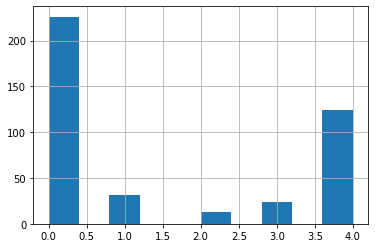

In [48]:
combined_df = pd.DataFrame({'PassengerId':X_test['PassengerId'],'Survived_SVC':svc_predictions,
                           'Survived_random_forest':forest_predictions,'Survived_logistic':logistic_predictions,
                            'Survived_kneighbours':kneighbours_predictions})
combined_df.set_index('PassengerId', inplace = True)
combined_df.sum(axis = 1).hist()